
Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3639 non-null   int64  
 1   idade           3639 non-null   int64  
 2   genero          3639 non-null   object 
 3   etnia           3639 non-null   object 
 4   pcd             3639 non-null   object 
 5   estado          3639 non-null   object 
 6   nivel_ensino    3639 non-null   object 
 7   nivel_carreira  3639 non-null   object 
 8   salario         3639 non-null   int64  
 9   experiencia     3639 non-null   int64  
 10  idh             3639 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 312.9+ KB
None

Dados faltantes por coluna:
ID                0
idade             0
genero            0
etnia             0
pcd               0
estado            0
nivel_ensino      0
nivel_carreira    0
salario           0
exper

<ipython-input-12-adb97728d1f3>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genero', y='salario', data=df, palette="Pastel1")
<ipython-input-12-adb97728d1f3>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='etnia', y='salario', data=df, palette="Set3")


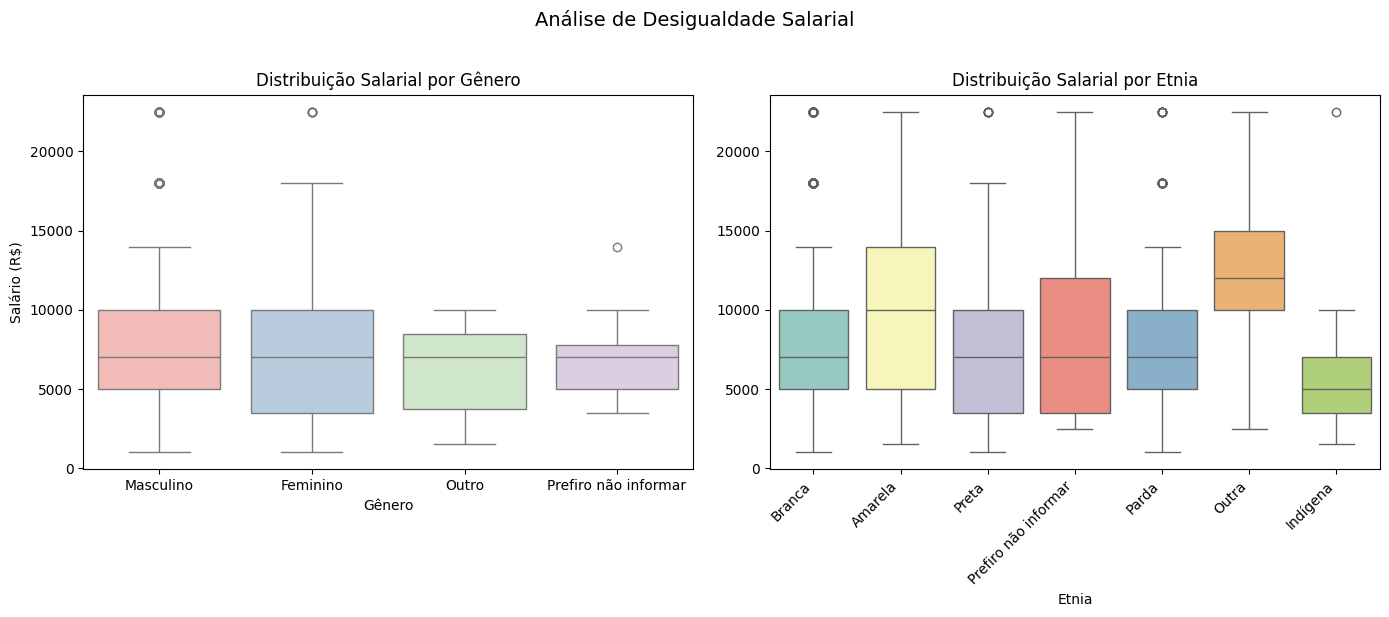


Melhores parâmetros (Regressor): {'max_depth': 3, 'min_samples_split': 2}

Métricas de desempenho - Regressão:
- R²: 0.50
- MSE: 11547990.59
- MAE: 2541.31


<ipython-input-12-adb97728d1f3>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")


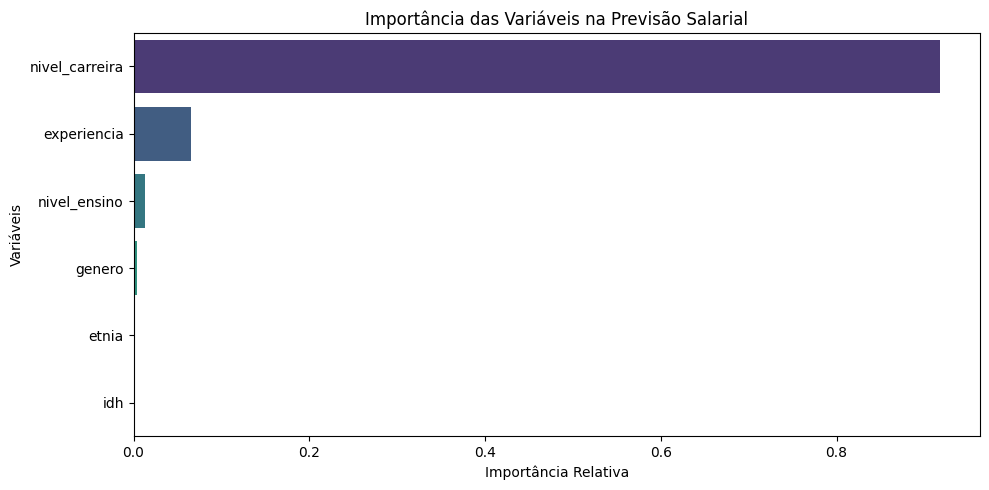

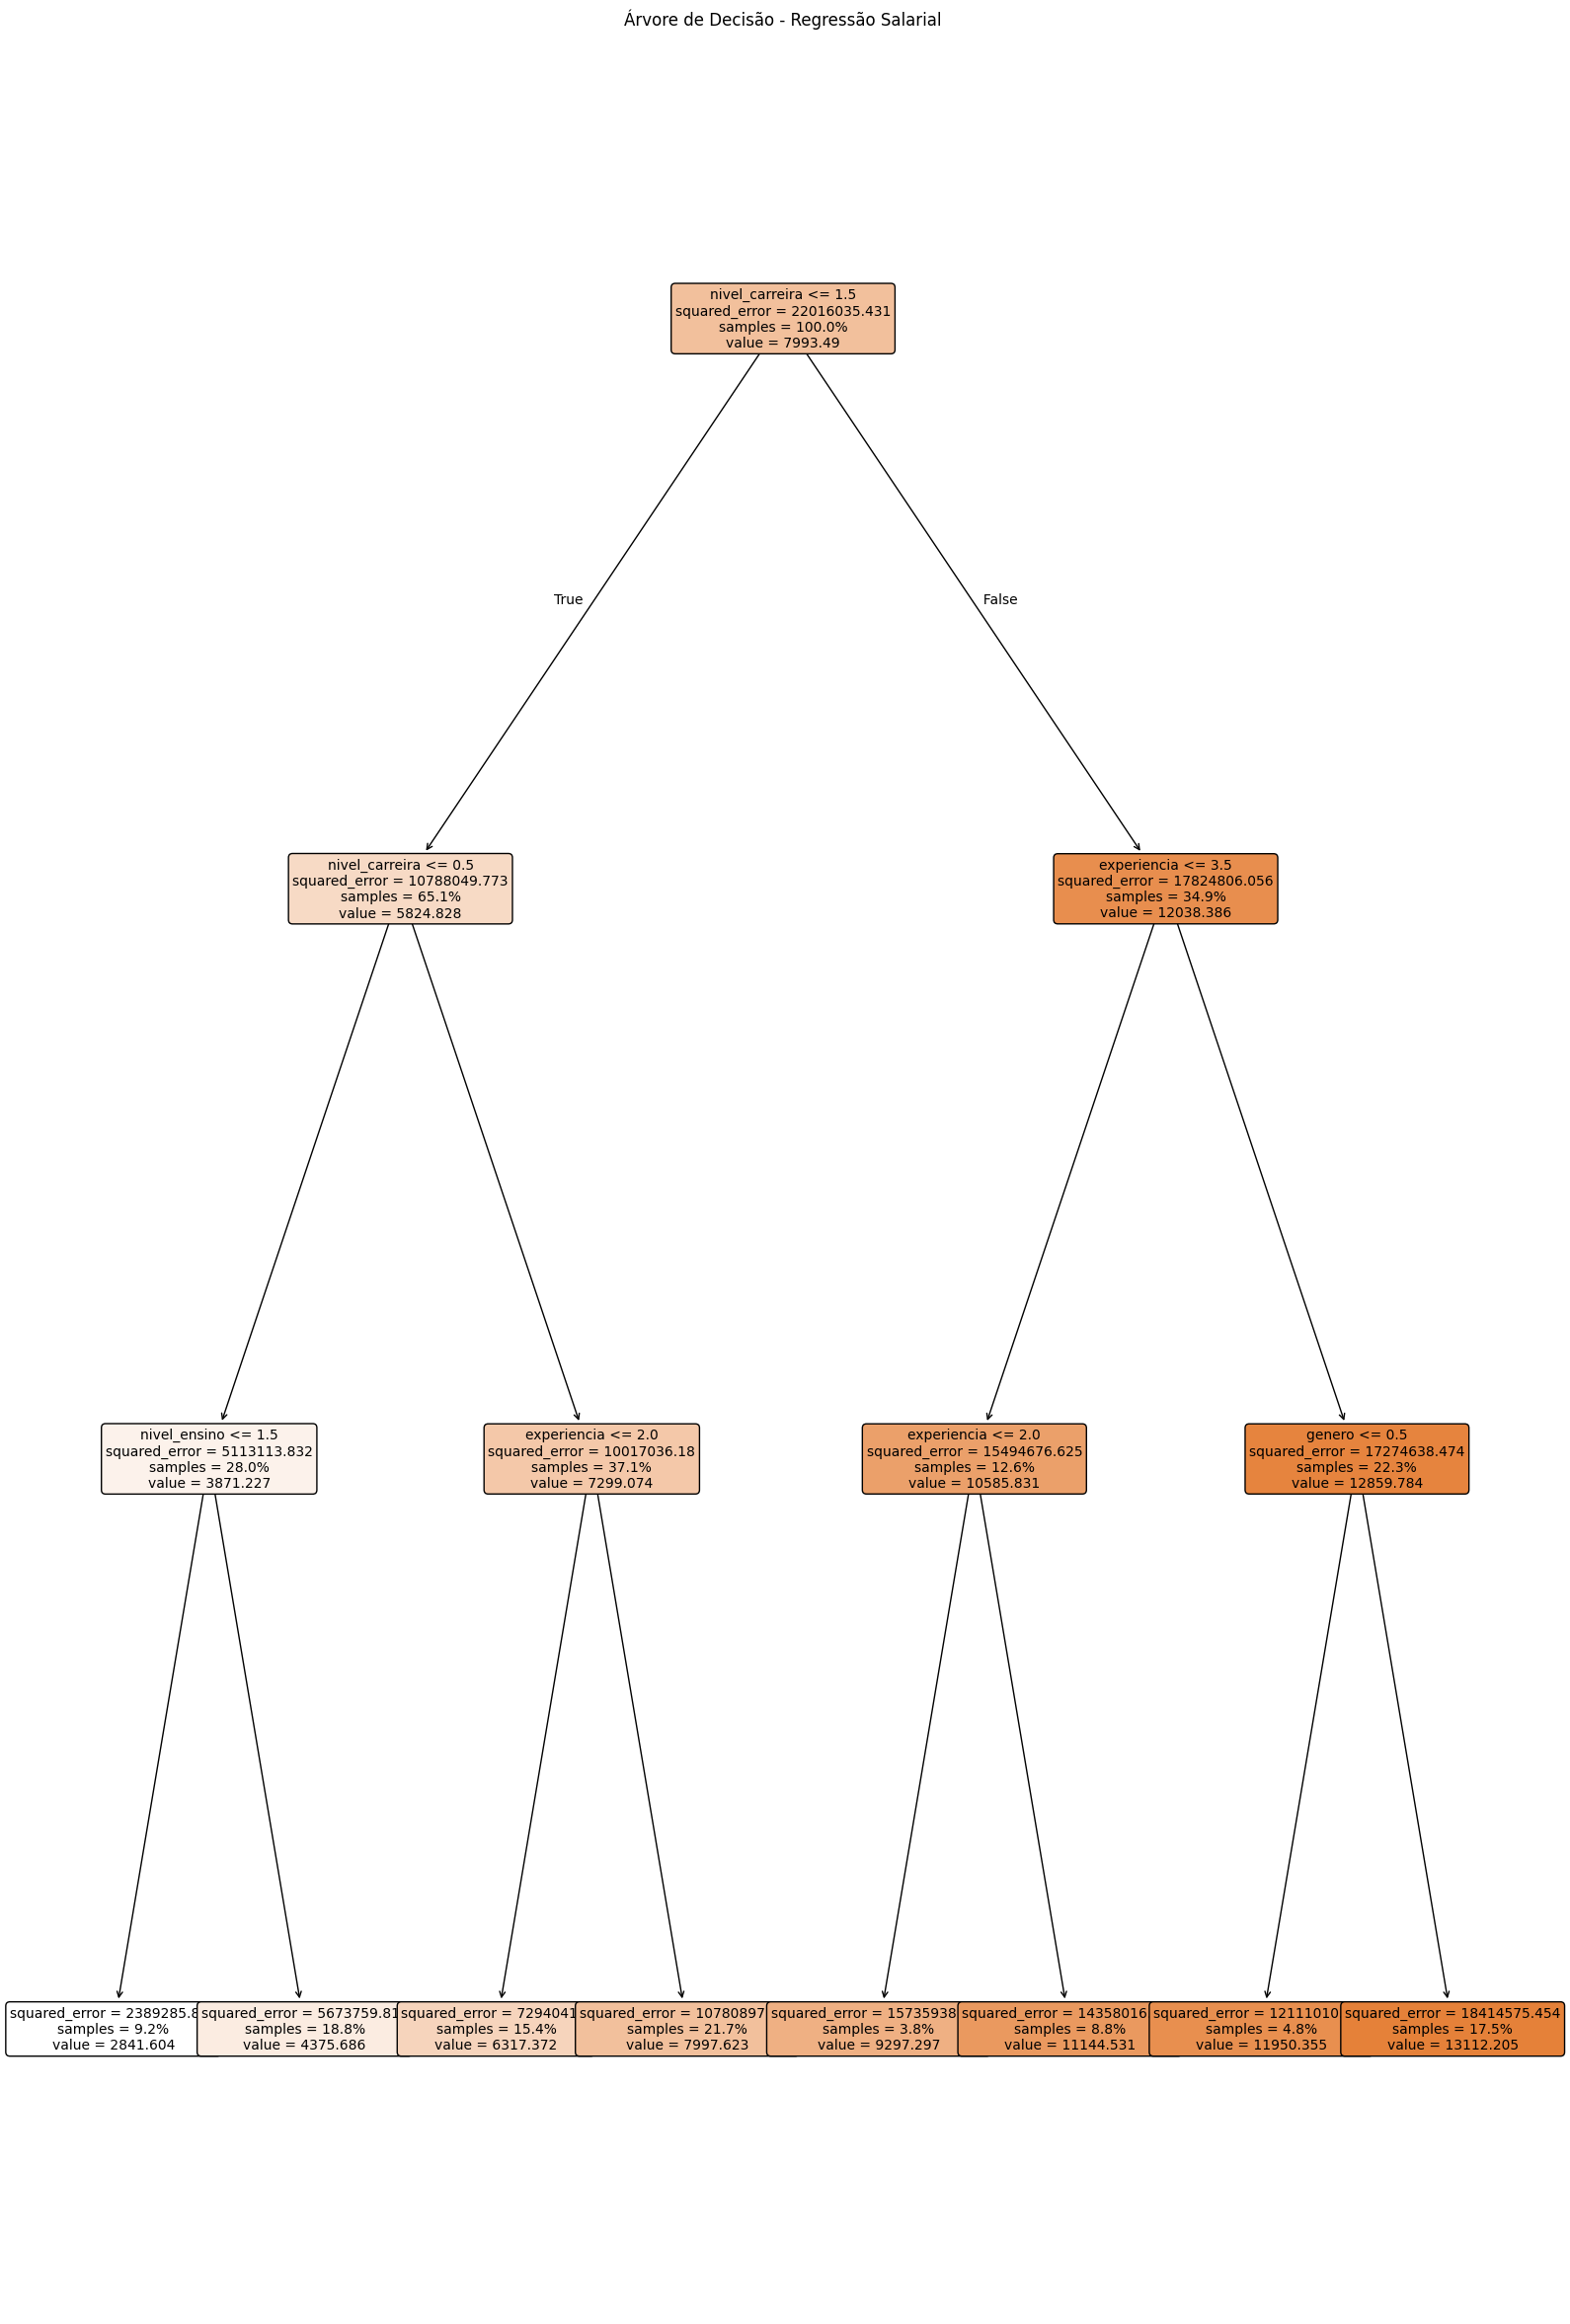


Acurácia - Classificação Binária:
- Treino: 0.82
- Teste: 0.81


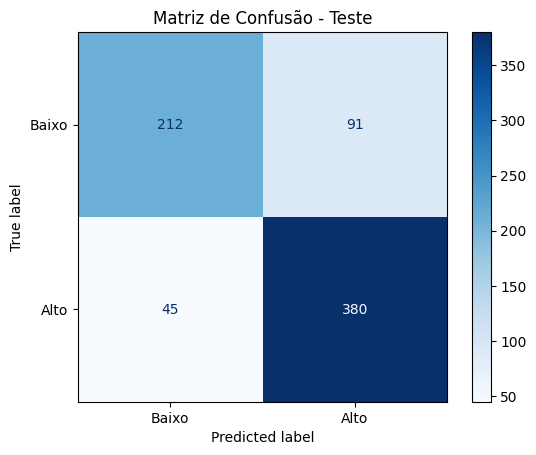

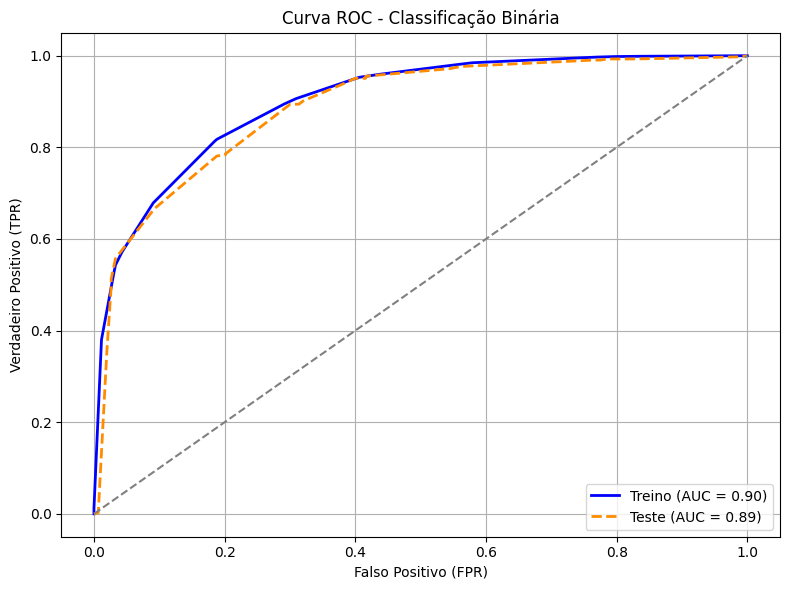

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# 1. Leitura e renomeação das colunas
df = pd.read_excel("Base de dados principal TRATADA ATUALIZADA.xlsx", header=0)

column_mapping = {
    "('P1_a ', 'Idade')": "idade",
    "('P1_b ', 'Genero')": "genero",
    "('P1_c ', 'Cor/raca/etnia')": "etnia",
    "('P1_d ', 'PCD')": "pcd",
    "('P1_i ', 'Estado onde mora')": "estado",
    "('P1_l ', 'Nivel de Ensino')": "nivel_ensino",
    "('P2_g ', 'Nivel')": "nivel_carreira",
    "Salário": "salario",
    "Tempo de experiência na área de dados (anos)": "experiencia",
    "IDH": "idh"
}
df = df.rename(columns=column_mapping)

# 2. Análise e limpeza
print("\nInformações do dataset:")
print(df.info())
print("\nDados faltantes por coluna:")
print(df.isnull().sum())

df = df.dropna()

# 3. Visualizações iniciais
plt.figure(figsize=(14, 6))
plt.suptitle("Análise de Desigualdade Salarial", fontsize=14, y=1.02)

# Gênero
plt.subplot(1, 2, 1)
sns.boxplot(x='genero', y='salario', data=df, palette="Pastel1")
plt.title("Distribuição Salarial por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Salário (R$)")

# Etnia
plt.subplot(1, 2, 2)
sns.boxplot(x='etnia', y='salario', data=df, palette="Set3")
plt.title("Distribuição Salarial por Etnia")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Etnia")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 4. Codificação de variáveis categóricas
categorical_cols = ['genero', 'etnia', 'nivel_ensino', 'nivel_carreira']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Regressão - Árvore de Decisão para previsão salarial contínua
features = ['genero', 'etnia', 'nivel_ensino', 'experiencia', 'idh', 'nivel_carreira']
X = df[features]
y = df['salario']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df['nivel_carreira']
)

reg_model = DecisionTreeRegressor(random_state=42)
params = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(reg_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_reg = grid_search.best_estimator_
print(f"\nMelhores parâmetros (Regressor): {grid_search.best_params_}")

# Avaliação Regressão
y_pred_reg = best_reg.predict(X_test)

print("\nMétricas de desempenho - Regressão:")
print(f"- R²: {r2_score(y_test, y_pred_reg):.2f}")
print(f"- MSE: {mean_squared_error(y_test, y_pred_reg):.2f}")
print(f"- MAE: {mean_absolute_error(y_test, y_pred_reg):.2f}")

# Importância das variáveis
importancias = pd.Series(best_reg.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")
plt.title("Importância das Variáveis na Previsão Salarial")
plt.xlabel("Importância Relativa")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

# Visualização da árvore de regressão
plt.figure(figsize=(20, 30))
plot_tree(best_reg, feature_names=features, filled=True, rounded=True, fontsize=10, proportion=True)
plt.title("Árvore de Decisão - Regressão Salarial")
plt.show()

# 6. Classificação Binária: Salário acima da mediana
mediana_salario = df["salario"].median()
df["salario_binario"] = (df["salario"] >= mediana_salario).astype(int)

X = df[features]
y = df["salario_binario"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("\nAcurácia - Classificação Binária:")
print(f"- Treino: {acc_train:.2f}")
print(f"- Teste: {acc_test:.2f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baixo", "Alto"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Teste")
plt.show()

# Curva ROC - Comparando treino vs teste
y_train_probs = clf.predict_proba(X_train)[:, 1]
y_test_probs = clf.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Treino (AUC = {roc_auc_train:.2f})", color="blue", linestyle="-", linewidth=2)
plt.plot(fpr_test, tpr_test, label=f"Teste (AUC = {roc_auc_test:.2f})", color="darkorange", linestyle="--", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR)")
plt.title("Curva ROC - Classificação Binária")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3639 entries, 0 to 3638
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3639 non-null   int64  
 1   idade           3639 non-null   int64  
 2   genero          3639 non-null   object 
 3   etnia           3639 non-null   object 
 4   pcd             3639 non-null   object 
 5   estado          3639 non-null   object 
 6   nivel_ensino    3639 non-null   object 
 7   nivel_carreira  3639 non-null   object 
 8   salario         3639 non-null   int64  
 9   experiencia     3639 non-null   int64  
 10  idh             3639 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 312.9+ KB
None

Dados faltantes por coluna:
ID                0
idade             0
genero            0
etnia             0
pcd               0
estado            0
nivel_ensino      0
nivel_carreira    0
salario           0
exper

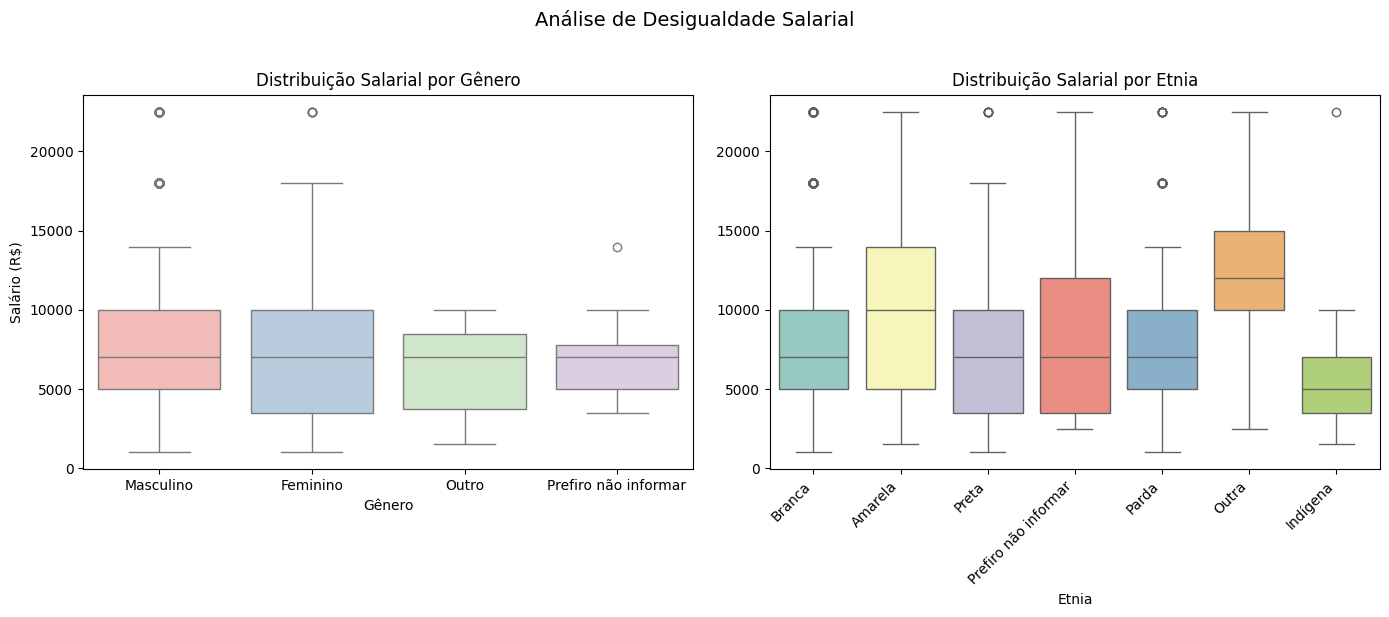


Melhores parâmetros (Regressor): {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}

Métricas de desempenho - Regressão (em R$):
- R²: 0.49
- MSE: 11852160.86
- MAE: 2467.38


<ipython-input-6-c6965fbd61d9>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")


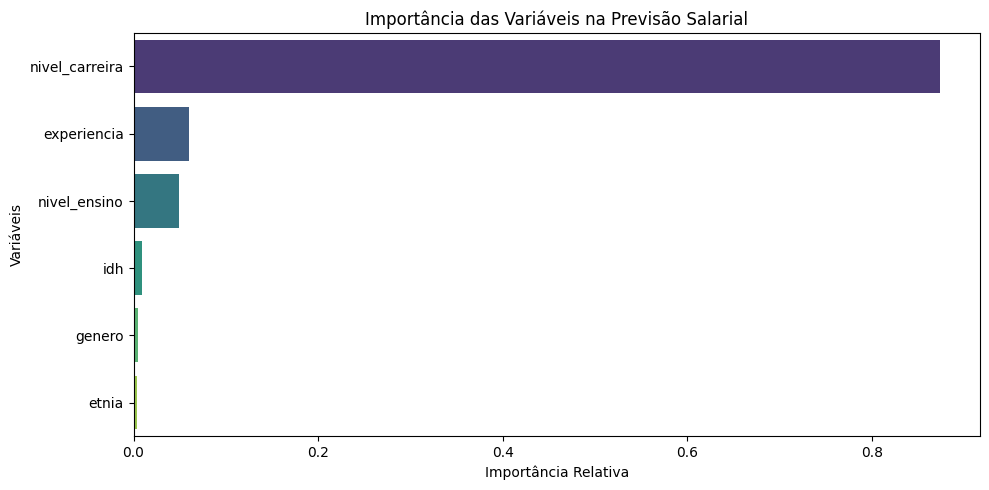

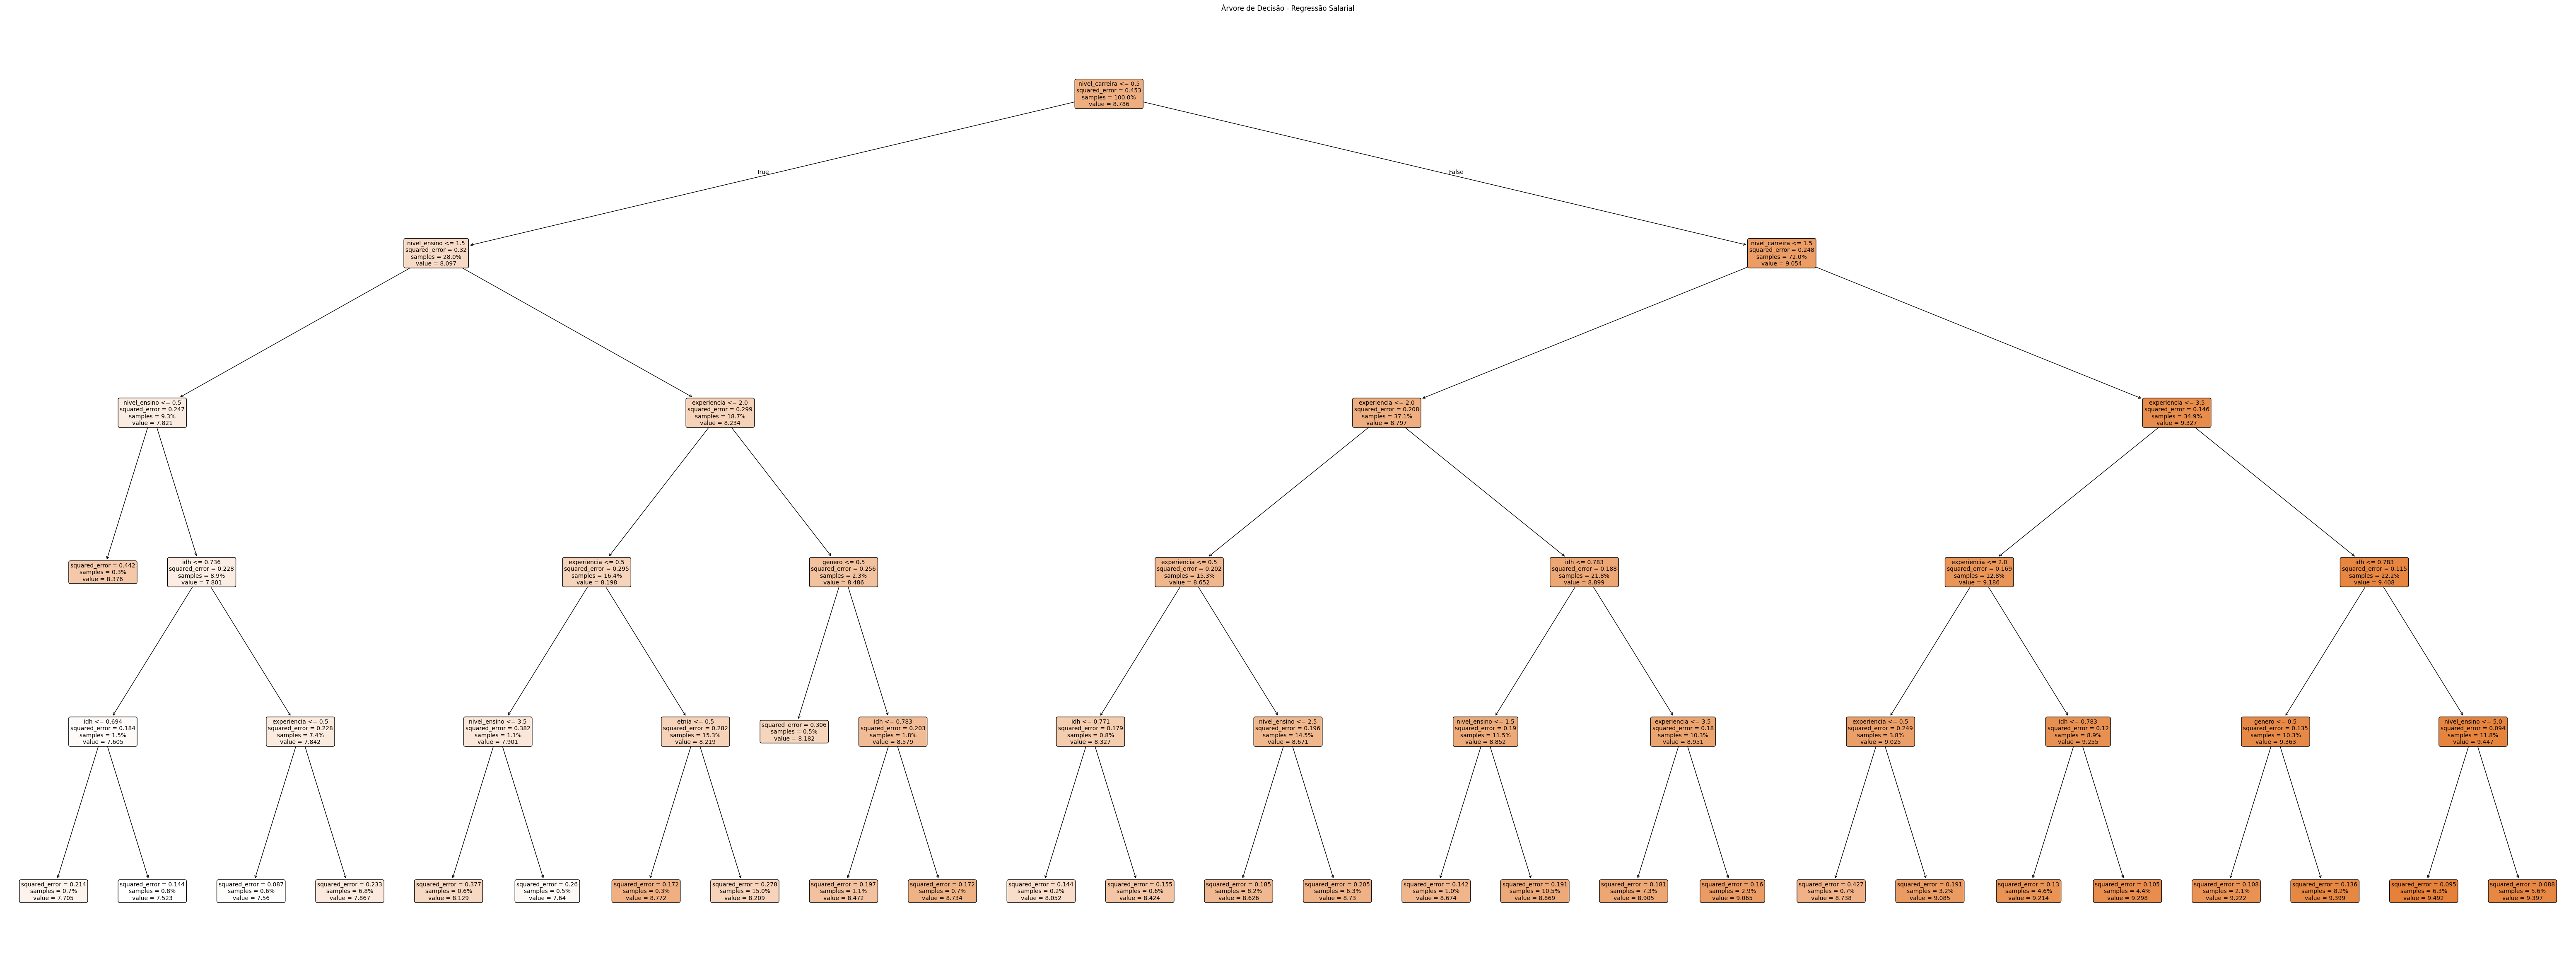


Acurácia - Classificação Binária:
- Treino: 0.83
- Teste: 0.80
Cross-validation accuracy: 0.79 (+/- 0.01)


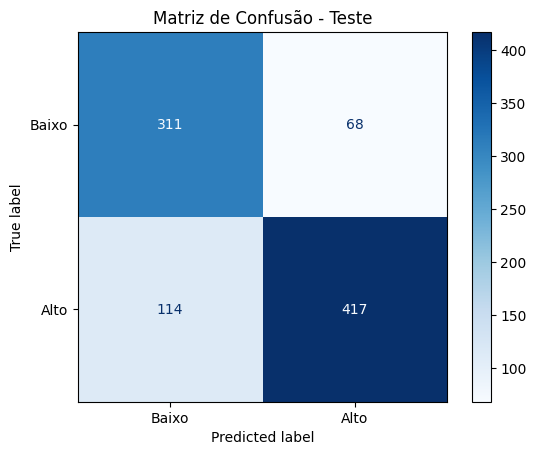

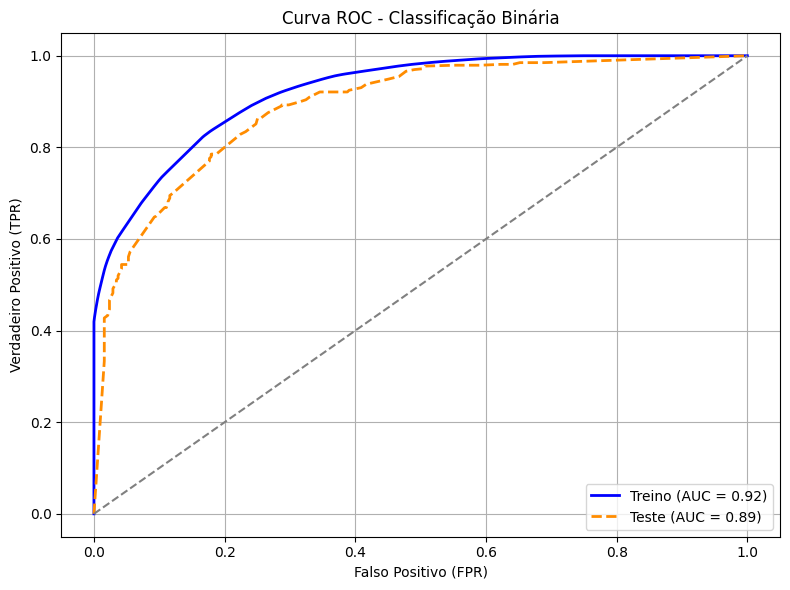

In [6]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)

# 1. Leitura e renomeação das colunas
df = pd.read_excel("Base de dados principal TRATADA ATUALIZADA.xlsx", header=0)

column_mapping = {
    "('P1_a ', 'Idade')": "idade",
    "('P1_b ', 'Genero')": "genero",
    "('P1_c ', 'Cor/raca/etnia')": "etnia",
    "('P1_d ', 'PCD')": "pcd",
    "('P1_i ', 'Estado onde mora')": "estado",
    "('P1_l ', 'Nivel de Ensino')": "nivel_ensino",
    "('P2_g ', 'Nivel')": "nivel_carreira",
    "Salário": "salario",
    "Tempo de experiência na área de dados (anos)": "experiencia",
    "IDH": "idh"
}
df = df.rename(columns=column_mapping)

# 2. Análise e limpeza
print("\nInformações do dataset:")
print(df.info())
print("\nDados faltantes por coluna:")
print(df.isnull().sum())
df = df.dropna()

# 3. Visualizações iniciais
plt.figure(figsize=(14, 6))
plt.suptitle("Análise de Desigualdade Salarial", fontsize=14, y=1.02)

# Gênero
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='genero', y='salario', hue='genero', palette="Pastel1", legend=False)
plt.title("Distribuição Salarial por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Salário (R$)")

# Etnia
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='etnia', y='salario', hue='etnia', palette="Set3", legend=False)
plt.title("Distribuição Salarial por Etnia")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Etnia")
plt.ylabel("")

plt.tight_layout()
plt.show()

# 4. Codificação de variáveis categóricas
categorical_cols = ['genero', 'etnia', 'nivel_ensino', 'nivel_carreira']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Regressão - Árvore de Decisão para previsão salarial contínua (com log)
df['salario_log'] = np.log1p(df['salario'])  # log-transform

features = ['genero', 'etnia', 'nivel_ensino', 'experiencia', 'idh', 'nivel_carreira']
X = df[features]
y = df['salario_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=df['nivel_carreira']
)

reg_model = DecisionTreeRegressor(random_state=42)

params = {
    'max_depth': [5, 8, 10, 12, 15, 18, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(reg_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_reg = grid_search.best_estimator_
print(f"\nMelhores parâmetros (Regressor): {grid_search.best_params_}")

# Avaliação da Regressão
y_pred_reg = best_reg.predict(X_test)

# Reverter log para comparação em escala original
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_reg)

print("\nMétricas de desempenho - Regressão (em R$):")
print(f"- R²: {r2_score(y_test_real, y_pred_real):.2f}")
print(f"- MSE: {mean_squared_error(y_test_real, y_pred_real):.2f}")
print(f"- MAE: {mean_absolute_error(y_test_real, y_pred_real):.2f}")

# Importância das variáveis
importancias = pd.Series(best_reg.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=importancias.values, y=importancias.index, palette="viridis")
plt.title("Importância das Variáveis na Previsão Salarial")
plt.xlabel("Importância Relativa")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

# Visualização da árvore de decisão
plt.figure(figsize=(80, 30))
plot_tree(best_reg, feature_names=features, filled=True, rounded=True, fontsize=10, proportion=True)
plt.title("Árvore de Decisão - Regressão Salarial")
plt.show()

# 6. Classificação Binária - Salário acima da mediana
mediana_salario = df["salario"].median()
df["salario_binario"] = (df["salario"] >= mediana_salario).astype(int)

X = df[features]
y = df["salario_binario"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clf = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10
)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("\nAcurácia - Classificação Binária:")
print(f"- Treino: {acc_train:.2f}")
print(f"- Teste: {acc_test:.2f}")

# Cross-Validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baixo", "Alto"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusão - Teste")
plt.show()

# Curva ROC - Comparando treino vs teste
y_train_probs = clf.predict_proba(X_train)[:, 1]
y_test_probs = clf.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Treino (AUC = {roc_auc_train:.2f})", color="blue", linestyle="-", linewidth=2)
plt.plot(fpr_test, tpr_test, label=f"Teste (AUC = {roc_auc_test:.2f})", color="darkorange", linestyle="--", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Falso Positivo (FPR)")
plt.ylabel("Verdadeiro Positivo (TPR)")
plt.title("Curva ROC - Classificação Binária")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()